# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 11.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.1

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# Importing necessary file to begin data analysis.
# Due to my drive settings, I prefer to upload the file from my laptop
from google.colab import files

# Open file dialog to upload a file
uploaded = files.upload()

Saving foodhub_order.csv to foodhub_order.csv


In [4]:
#Move contents of file to a dataframe
df = pd.read_csv('foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
#Number of rows and columns
df.shape

(1898, 9)

#### Observations: 1898 rows, 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
#Datatypes of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 4 integer (int64) fields, 4 object fields, and 1 float/decimal field


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
#Check for missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: Data not missing in any row
Note that we do have 'Not Rated' orders, addressed in question 5.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
#Statistical Summary for all values, transposed for easier analysis
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [10]:
#Statistical Summary for food preparation time
print(df["food_preparation_time"].describe().T)

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


#### Observations: Food preparation time from the dataset

Minimum = 20 mins

Average = 27.37 mins (27mins and 22 seconds)

Maximum = 35 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
#Check the rating column to find all distinct values to ensure we are not missing any entries with different case/error
print("The different ratings available in the file are : ",df['rating'].unique())

The different ratings available in the file are :  ['Not given' '5' '3' '4']


In [12]:
#Finding the number of orders not rated = 'Not given'
count = df['rating'].value_counts().get('Not given', 0)
print("Number of orders not rated: ",count)

Number of orders not rated:  736


#### Observations: 736 orders are not rated in the file, and have a value of 'Not given'.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# Order ID

In [ ]:
# check unique order ID
print("Number of unique Order IDs: ", df['order_id'].nunique())

Number of unique Order IDs:  1898


**Observation** : Order ID is unique, and the data indicates one line per order.

# Customer ID

In [ ]:
# Check unique number of customer ID
print("Number of unique Customer IDs: ",df['customer_id'].nunique())

Number of unique Customer IDs:  1200


In [ ]:
#Distibution of Customer IDs with multipe orders
df['customer_id'].value_counts().head(10)

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
82041,7
65009,7
276192,7
97079,6


Text(0.5, 1.0, 'Distribution of Number of Orders per Customer')

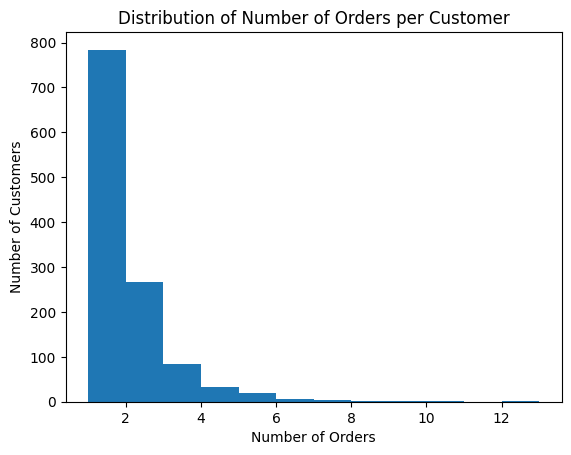

In [ ]:
# Visualizing the number of customers with multiple orders (as idenitfied by multiple lines)
plt.hist(df['customer_id'].value_counts(), bins=12);
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Number of Orders per Customer')

Text(0.5, 1.0, 'Distribution of Customers who ordered 3 or more times')

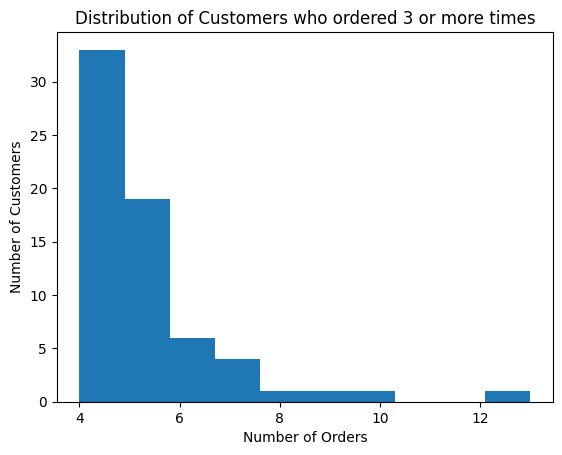

In [ ]:
# Since a vast majority of customers have only one or 2 order, visualizing customers with 4 or more orders better (more than three lines)

#Creating a temporary dataframe to only include lines for Customer IDs with 4 or more lines
df_multiple_orders = df[df['customer_id'].isin(df['customer_id'].value_counts()[df['customer_id'].value_counts() > 3].index)]
# Visualizing the number of customers with multiple orders (as idenitfied by multiple lines)
plt.hist(df_multiple_orders['customer_id'].value_counts(), bins=10);
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers who ordered 3 or more times')

**Observation**: Most customers have ordered only once or twice, and a very small percentage of customers have ordered multiple times.

# Restaurants

In [ ]:
# Check unique number of Restaurants
print("Number of unique restaurants: ",df['restaurant_name'].nunique())

Number of unique restaurants:  178


In [ ]:
#Listing the top 10 restaurants by orders recieved (based on number of rows)
df['restaurant_name'].value_counts().head(10)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


Text(0.5, 1.0, 'Distribution of Number of Orders per Restaurant')

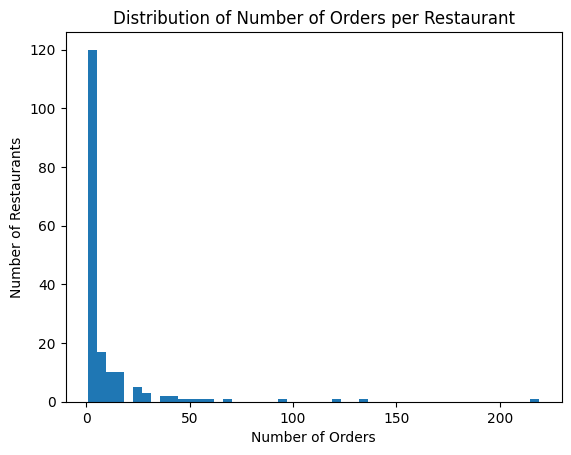

In [ ]:
#Visualizing the distribution of restaurants based on orders received
plt.hist(df['restaurant_name'].value_counts(), bins=50);
plt.xlabel('Number of Orders')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Number of Orders per Restaurant')

# Cuisine Type

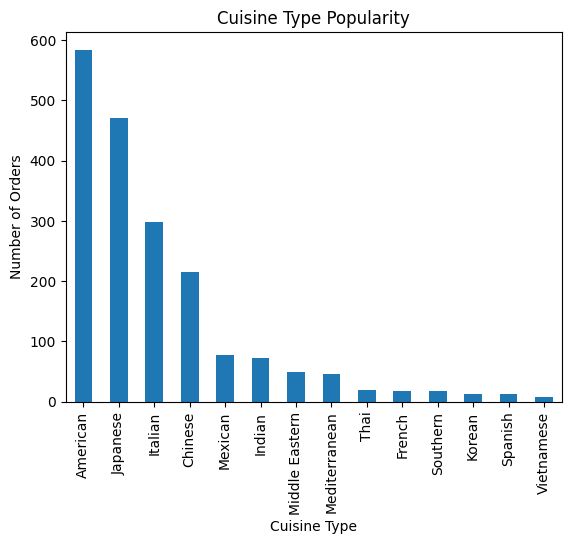

In [ ]:
# Count the frequency of each cuisine type to understand customer preferences in cuisine.
cuisine_counts = df['cuisine_type'].value_counts()
# Plotting as a bar chart to easily visualize popularity
cuisine_counts.plot(kind = 'bar')
plt.title('Cuisine Type Popularity')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.show()

# Order Cost

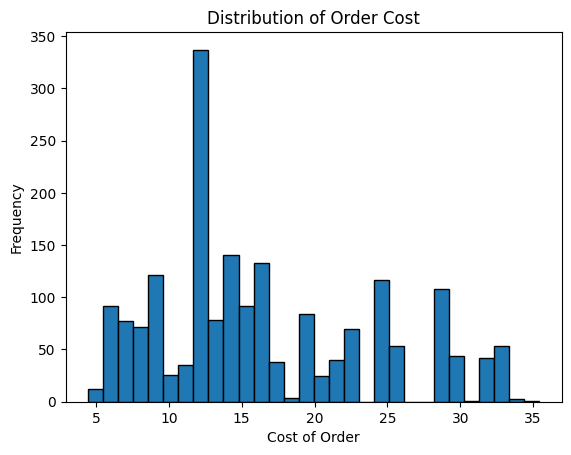

In [ ]:
# Plot the distribution of order costs to understand the spending pattern of customers.
# This helps identify typical spending and detect any outliers.
df['cost_of_the_order'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Order Cost')
plt.xlabel('Cost of Order')
plt.ylabel('Frequency')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Finding the top 5 restaurants by orders received. Since we know from above that order ID is unique, we can find this information by counting rows by restaurant name.
top5_rest = df['restaurant_name'].value_counts().nlargest(5)
print(top5_rest)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


Text(0, 0.5, 'Count')

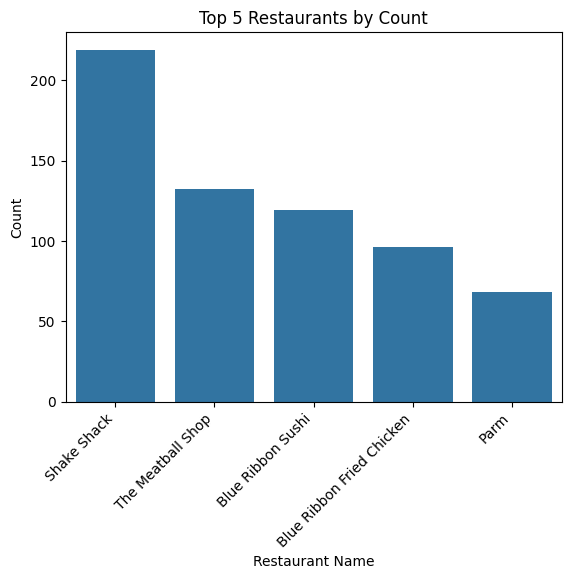

In [ ]:
sns.barplot(x=top5_rest.index, y=top5_rest.values);
plt.title('Top 5 Restaurants by Count')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

#### Observations: Top 5 restaurants by orders received

Shake Shack                  219

The Meatball Shop            132

Blue Ribbon Sushi            119

Blue Ribbon Fried Chicken     96

Parm                          68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

Text(0, 0.5, 'Count')

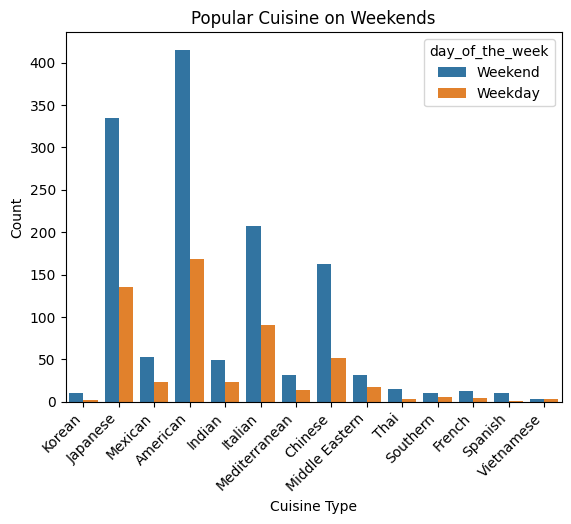

In [ ]:
#Plotting a barchart of cuisines ordered by day_of_the_week. Choosing a countplot to also see if there any other patterns in the data (e.g. some cuisine being more popular on weekdays)
sns.countplot(x='cuisine_type', hue='day_of_the_week', data=df);
plt.title('Popular Cuisine on Weekends')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

#### Observations: American cuisine is overwhelmingly the most popular cuisine on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#Finding the percentage of orders that cost more than 20 dollars by finding the rows in the table when order value is greater than 20
exp_orders =(df['cost_of_the_order'] > 20).sum()
print( (exp_orders/len(df) * 100),"% of orders cost more than $20")

29.24130663856691 % of orders cost more than $20


Text(0, 0.5, 'Count')

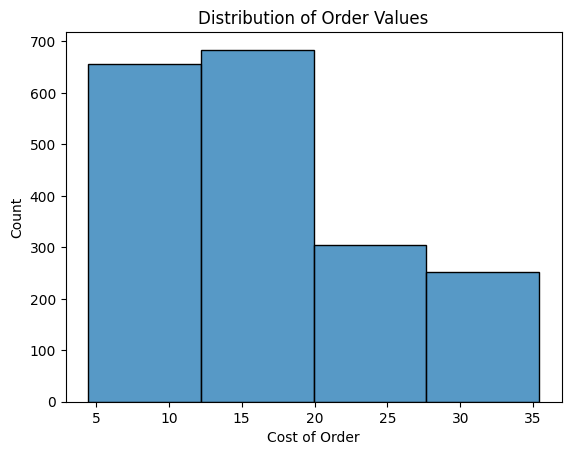

In [ ]:
#A visual distribution of order values, bin sizes adjusted for easier visualization
sns.histplot(x='cost_of_the_order', data=df, bins=4);
plt.title('Distribution of Order Values')
plt.xlabel('Cost of Order')
plt.ylabel('Count')

#### Observations: 29.24% of orders cost more than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
#Mean order delivery time by finding the mean of delivery times
count_mean_delivery = df['delivery_time'].mean()
print("Mean order delivery time: ",count_mean_delivery)

Mean order delivery time:  24.161749209694417


Text(0, 0.5, 'Count')

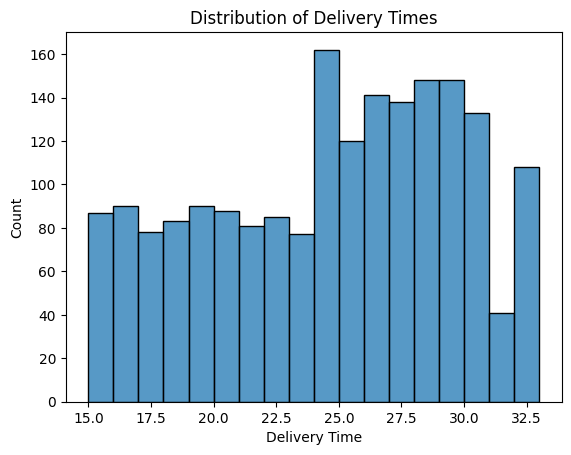

In [ ]:
#Observing overall trends in delivery times
sns.histplot(x='delivery_time', data=df, bins=18);
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

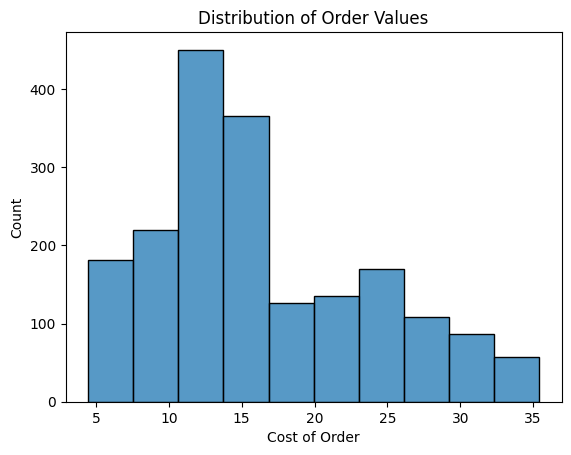

In [65]:
#plot order value
sns.histplot(x='cost_of_the_order', data=df, bins=10);
plt.title('Distribution of Order Values')
plt.xlabel('Cost of Order')
plt.ylabel('Count')

#### Observations: Mean order delivery time is 24 mins and 10 seconds (24.16mins)


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [66]:
#Since we know order IDs are unique, we can find the number of rows by customer ID to find the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().nlargest(3)
print(top_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: The below customer IDs are the most frequent and should receive the 20% discount vouchers.

ID.    - Orders

52832  -  13

47440  - 10

83287   -  9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# Restaurants and Ratings

<ipython-input-71-91a93c758843>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


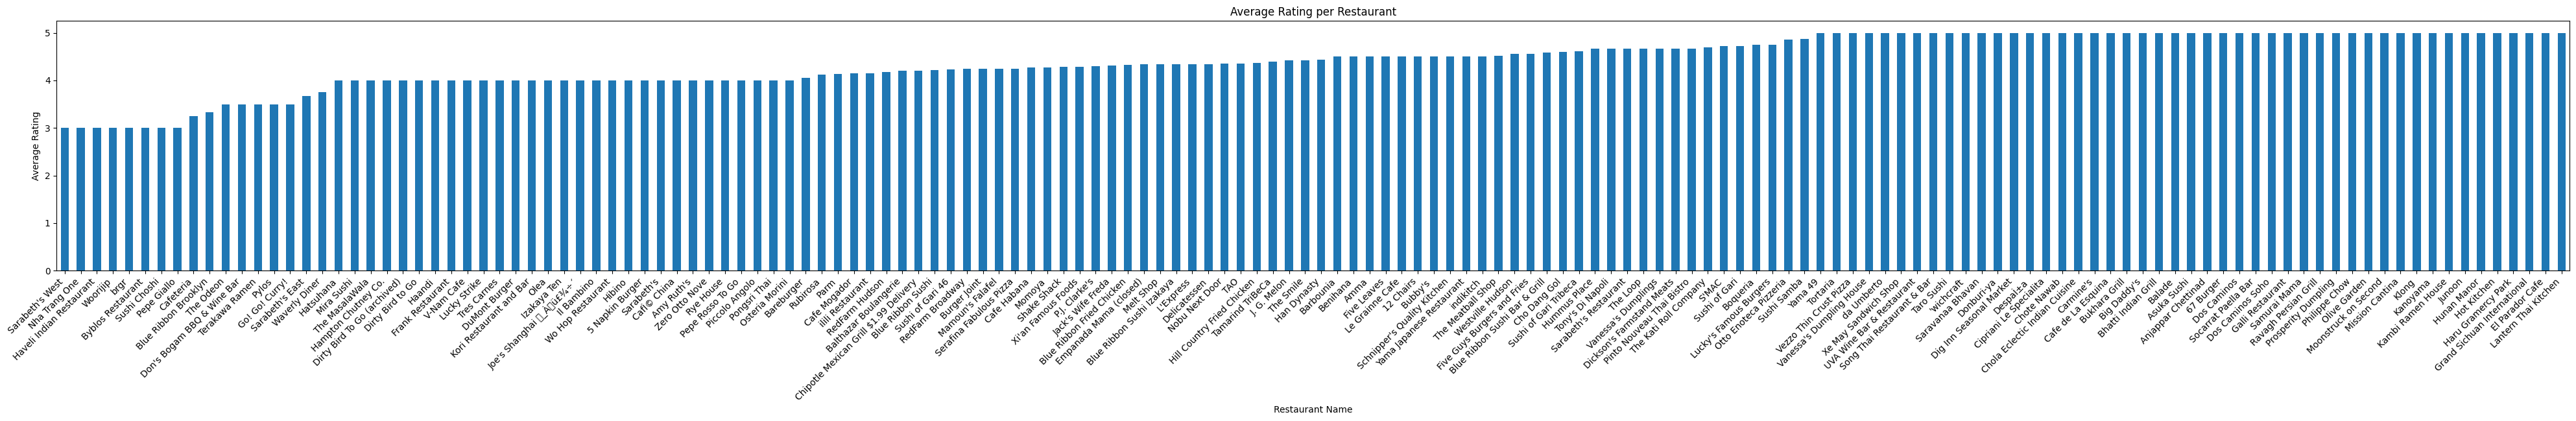

In [71]:
#Since we know from question 5 that we have unrated orders, only reviewing orders w/ ratings
# Filter out rows with non-numeric ratings
df_filtered = df[df['rating'] != 0]
# Convert ratings to numeric
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])
# Calculate average rating per restaurant
avg_rating_per_restaurant = df_filtered.groupby('restaurant_name')['rating'].mean().sort_values()
# Plot the results - not increased figsize to 50 to accomodate the data
avg_rating_per_restaurant.plot(kind='bar', figsize=(50, 5))
plt.title('Average Rating per Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

## Order Cost by Cuisine

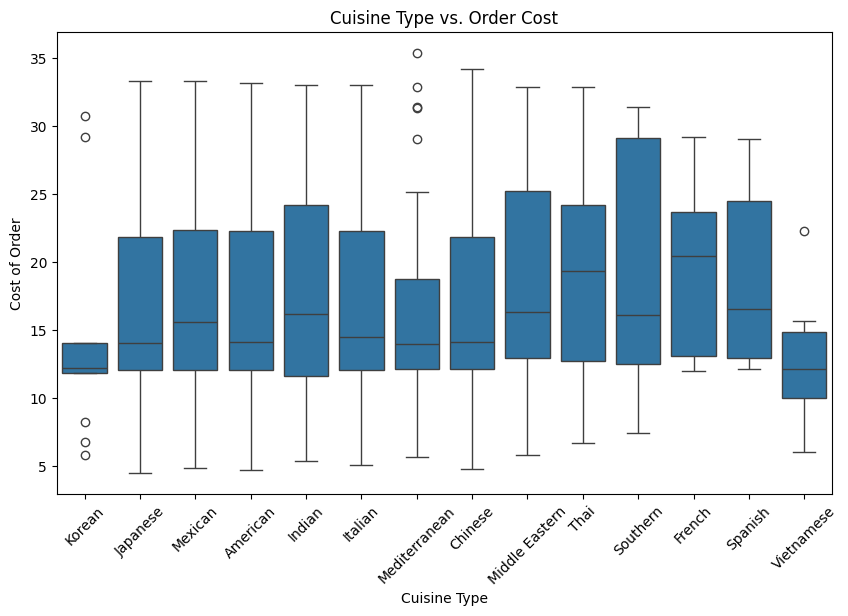

In [22]:
# Compare cuisine types with order costs to see if certain cuisines are typically higher or lower in cost
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.title('Cuisine Type vs. Order Cost')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.xticks(rotation=45)
plt.show()

# Weekday/weekend vs Order Cost

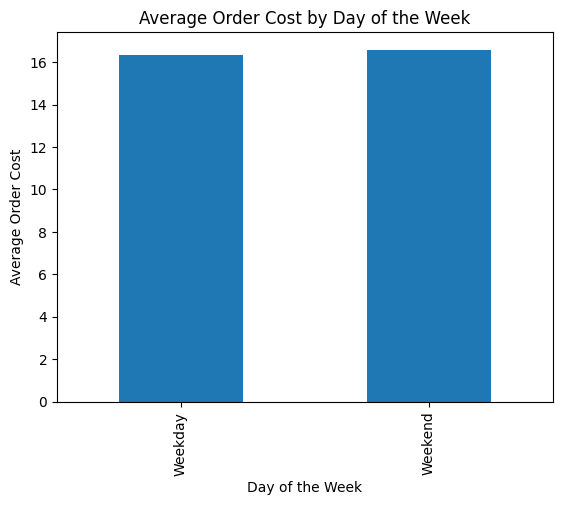

In [25]:
# Examine if spending varies between weekdays and weekends, which could help in setting pricing strategies.
avg_cost_per_day = df.groupby('day_of_the_week')['cost_of_the_order'].mean()
avg_cost_per_day.plot(kind='bar')
plt.title('Average Order Cost by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Order Cost')
plt.show()

# Food Preparation Time vs. Rating

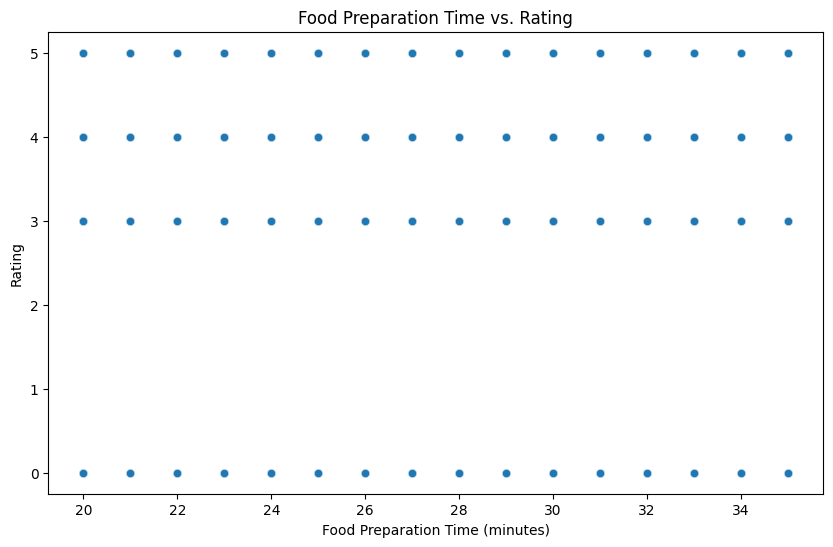

In [26]:
# Scatter plot to check if longer preparation times lead to lower customer ratings, revealing potential satisfaction issues.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='food_preparation_time', y='rating', alpha=0.5)
plt.title('Food Preparation Time vs. Rating')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Rating')
plt.show()

# Food prep time by Restaurant

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


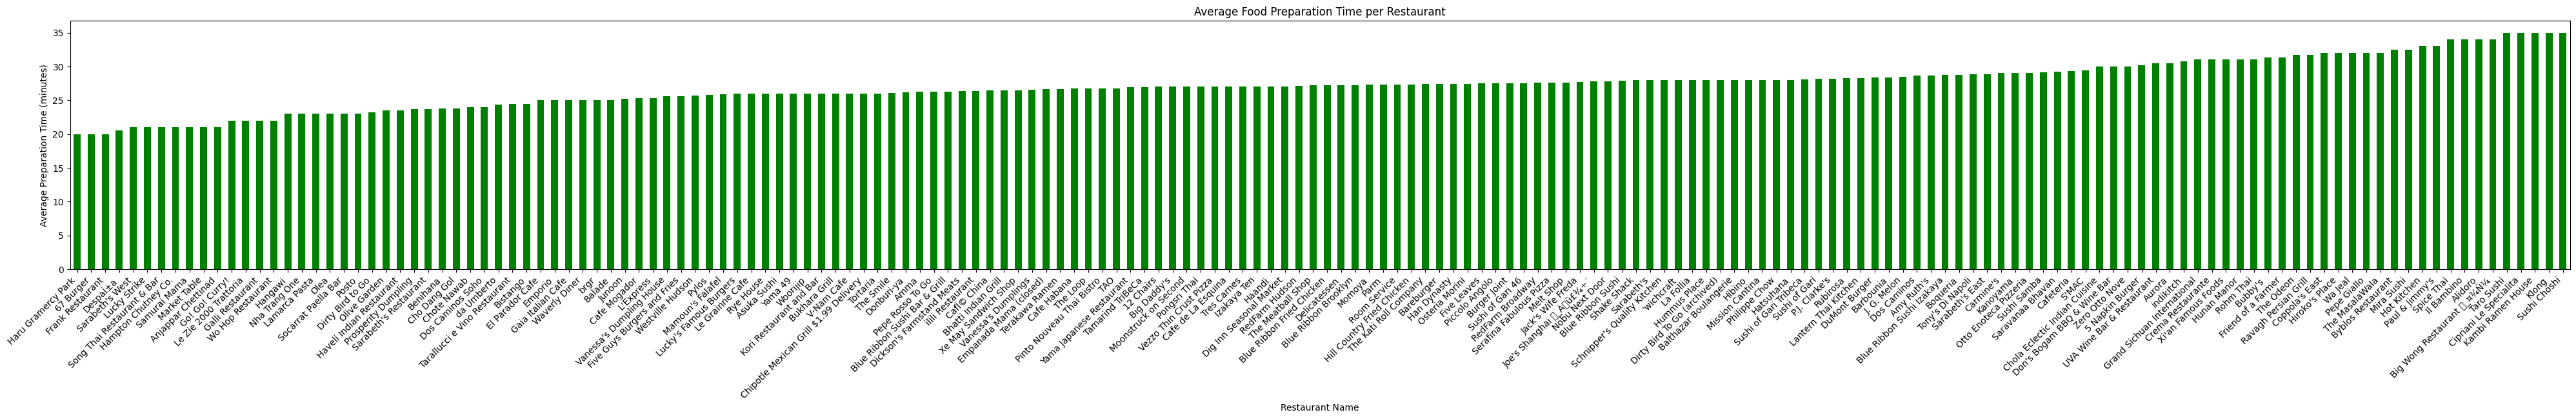

In [31]:
# Calculate the average preparation time per restaurant to identify slow and fast performers.
avg_prep_time = df.groupby('restaurant_name')['food_preparation_time'].mean().sort_values()
avg_prep_time.plot(kind='bar', figsize=(50, 5), color='green')
plt.title('Average Food Preparation Time per Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Preparation Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()


# Delivery Time vs Cuisine

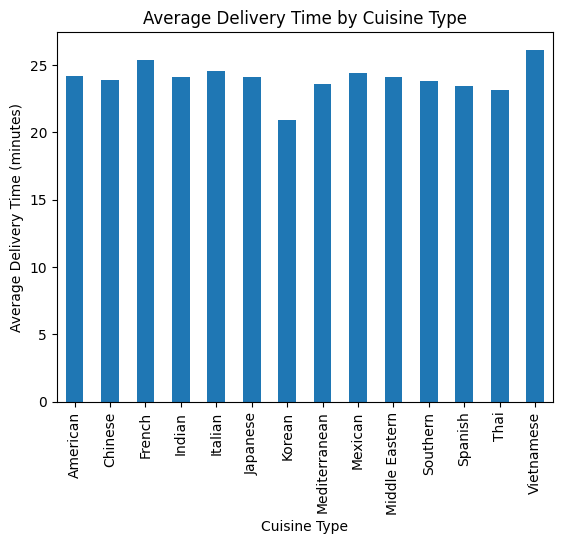

In [28]:
# Check if certain cuisines have longer delivery times, possibly due to prep complexity or delivery factors.
avg_delivery_time = df.groupby('cuisine_type')['delivery_time'].mean()
avg_delivery_time.plot(kind='bar')
plt.title('Average Delivery Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Delivery Time (minutes)')
plt.show()

# Order cost vs prep & delivery times

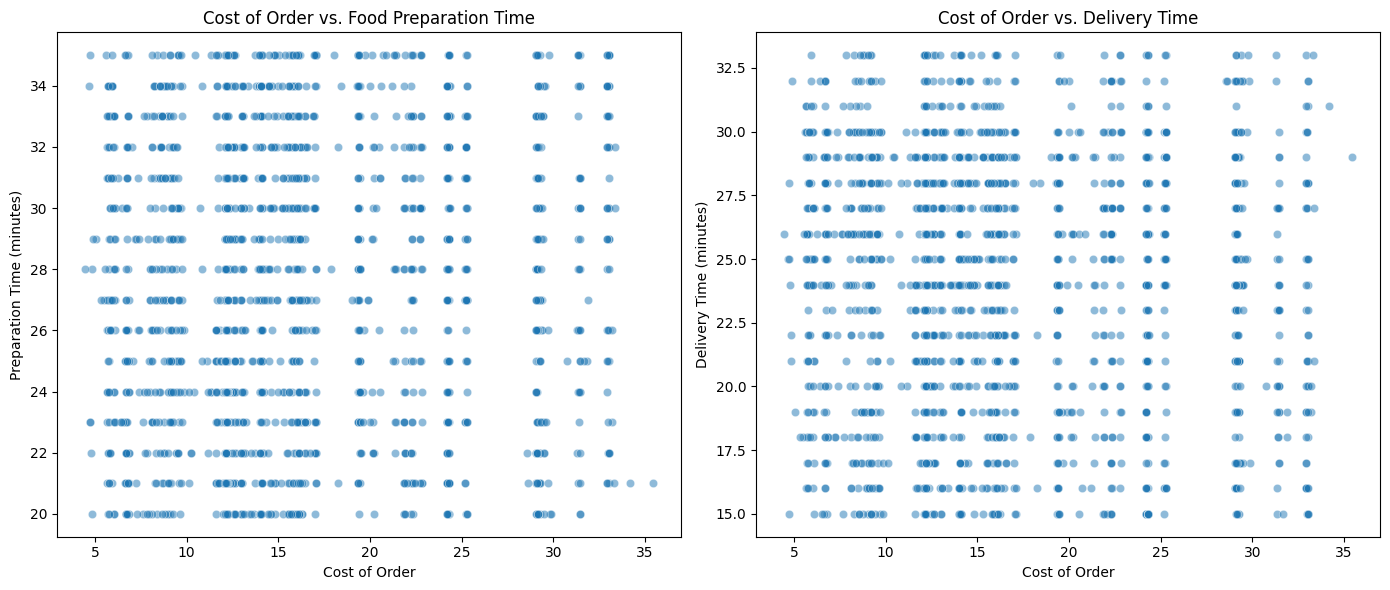

In [32]:
# Scatter plots to see if higher-cost orders tend to have longer preparation or delivery times, helping gauge if premium dishes are slower.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df, x='cost_of_the_order', y='food_preparation_time', ax=axes[0], alpha=0.5)
axes[0].set_title('Cost of Order vs. Food Preparation Time')
axes[0].set_xlabel('Cost of Order')
axes[0].set_ylabel('Preparation Time (minutes)')

sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time', ax=axes[1], alpha=0.5)
axes[1].set_title('Cost of Order vs. Delivery Time')
axes[1].set_xlabel('Cost of Order')
axes[1].set_ylabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()


# Corelation analysis

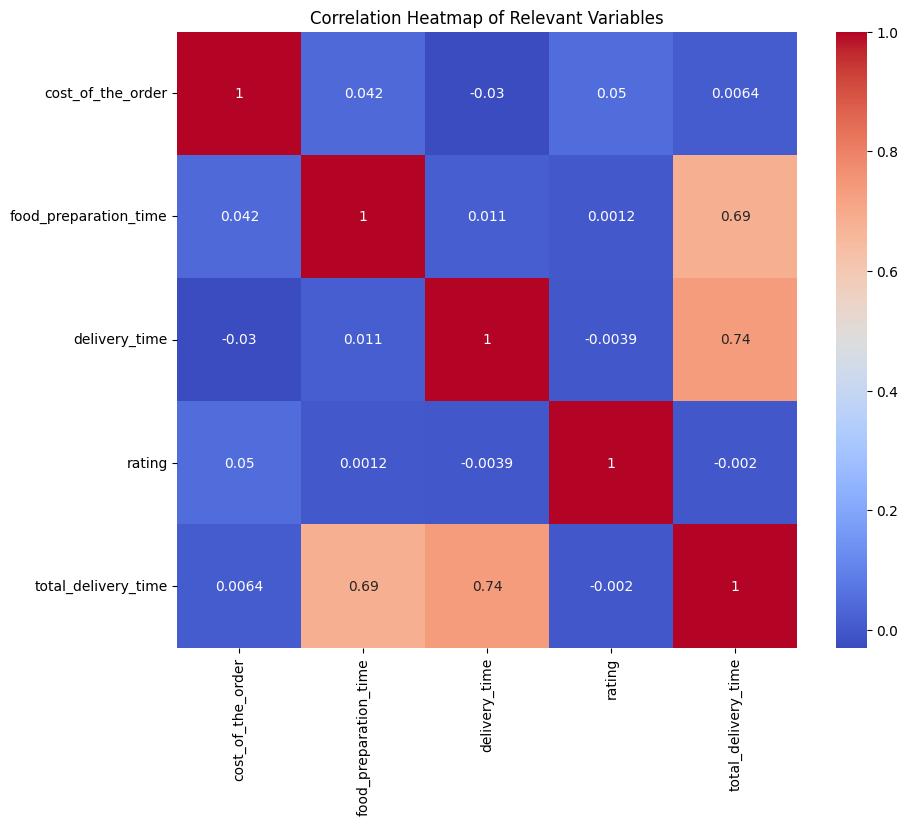

In [83]:
# Select relevant columns for correlation analysis
key_metrics = [
    'cost_of_the_order',
    'food_preparation_time',
    'delivery_time',
    'rating'
]

# Convert rating to numeric (handling non-numeric values like "Not given")
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Compute total delivery time (food preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Include the total delivery time in relevant columns
key_metrics.append('total_delivery_time')

# Compute the correlation matrix
correlation_matrix = df[key_metrics].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Relevant Variables')
plt.show()

Observation: Not seeing a strong co-relation between ratings and delivery times.

# **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [78]:
#First, we filter out 'Not given' ratings
df_filtered = df[df['rating'] != 0]
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])

#Calculate average rating
rating_stats = df_filtered.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

#sort the data in descending order of count
rating_stats = rating_stats.sort_values(by='count', ascending=False)

rating_stats.head(10)

<ipython-input-78-f826aa2f9da6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])


,restaurant_name,count,mean
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905
17,Blue Ribbon Sushi,73,4.219178
16,Blue Ribbon Fried Chicken,64,4.328125
104,RedFarm Broadway,41,4.243902
94,Parm,39,4.128205
105,RedFarm Hudson,34,4.176471
125,TAO,28,4.357143
106,Rubirosa,24,4.125000
88,Nobu Next Door,23,4.347826


In [77]:
#Filter restaurants meeting the criteria (rating count > 50 and average rating > 4)
eligible_restaurants = rating_stats[(rating_stats['count'] > 50) & (rating_stats['mean'] > 4)]

# Display the eligible restaurants
print("Eligible Restaurants for Promotional Offer:")
print(eligible_restaurants)

Eligible Restaurants for Promotional Offer:
               restaurant_name  count      mean
117                Shake Shack    133  4.278195
132          The Meatball Shop     84  4.511905
17           Blue Ribbon Sushi     73  4.219178
16   Blue Ribbon Fried Chicken     64  4.328125


#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Frid Chicken fulfill this criteria.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [47]:
#While there are a few ways to do this, simply doing it with a loop statement

total_revenue = 0

#Calculate revenue by looping through each row
for cost in df['cost_of_the_order']:
    if cost > 20:
        total_revenue += cost * 0.25  # Add 25% commission for orders > 20
    elif cost > 5:
        total_revenue += cost * 0.15  # Add 15% commission for orders > 5

print("Total Revenue Generated: $", total_revenue)

Total Revenue Generated: $ 6166.302999999994


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [57]:
#Calculate total time
df['total_ddelivery_time'] = df['food_preparation_time'] + df['delivery_time']

total_orders = len(df)

hour_plus_orders = len(df[df['total_ddelivery_time'] > 60])

percentage_hour_plus = (hour_plus_orders / total_orders) * 100
print(percentage_hour_plus, "% of orders took more than 60mins to be delivered from the time order was placed")

10.537407797681771 % of orders took more than 60mins to be delivered from the time order was placed


#### Observations:
10.54% of the orders took more than order to be delivered from the time the order was placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [58]:
#Calculate mean delivery time by Weekday/Weekend
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Display the mean delivery times
print("Mean Delivery Time by Day of the Week:")
print(mean_delivery_time)

Mean Delivery Time by Day of the Week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
Weekday orders, while fewer, took on average, ~6mins more, to be delivered compared to weekend.


# Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# Conclusions:

**Recommendations**

Promote High-Demand and High-Rated Cuisines:

*   American cuisine is the clear leader, consider partnering with more American restaurants to drive more users to use the delivery service.
*   Spanish cuisine has higher customer ratings, consider promoting these restaurants.
*   Experiment w/ spotlights on other cuisines like Thai, Korean, Indian, and Southern to show diversity of options to induce demand.

Promote and enhance Feedback

*   Experiment w/ different UI/reminders to solicit more feedback.
*   Consider gathering additional feedback. E.g. food, delivery time, service
*  Encourage more customers to leave ratings by offering incentives like discounts or loyalty points.
*   Promote highly rated restaurants


Address Delivery Times:

*   Investigate reasons for 10.54% of orders exceeding 60 minutes.
*   Consider having more delivery people for weekends, clustered around popular restaurants to further reduce delivery time, and improve customer experience.
*   Consider expanding support for weekday delivery (to reduce delivery time - currently ~6mins more) and potentially induce more weekday demand (which currently trails weekend demand).

Promote higher value orders (>$20)

*   Promote upsell/cross-sell menu items to drive higher order values (Based on Q14, higher commission for more expensive orders)
*   Consider promotions/bonus loyalty points for higher value orders.


**Suggested projects**


In addition to implementing the recommendations above on the Foodhub platform, consider the following projects

* Build a ML model to forecast demand patterns by cuisine, restaurant (location), and time. This can help with dynamic staffing of delivery people.
* Build a ML model to predict customer patterns to provide more streamlined recommendations and induce demand.
* Build a ML model to analyze restaurant performance - food prep time and rating, to continuously curate the list of restaurants to ensure customers have a great experience.


---